<a href="https://colab.research.google.com/github/rajiul123/digit_recognition/blob/main/digit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [6]:
digits = load_digits()
df = pd.DataFrame(digits["data"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df["label"] = digits.target

In [170]:
print(df)

        0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  label  
0     0.0  6.0  13.0  1

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
df.shape

(1797, 65)

<Figure size 640x480 with 0 Axes>

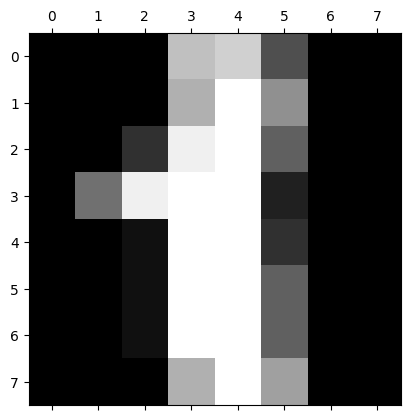

In [20]:
plt.gray()
plt.matshow(digits.images[1]);

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["label"], axis=1), df.label, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# Logistic Regression

In [71]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [72]:
y_pred_lr = lr.predict(X_test)

In [73]:
lr.score(X_test, y_test)

0.975

In [74]:
accuracy_score(y_test, y_pred_lr)

0.975

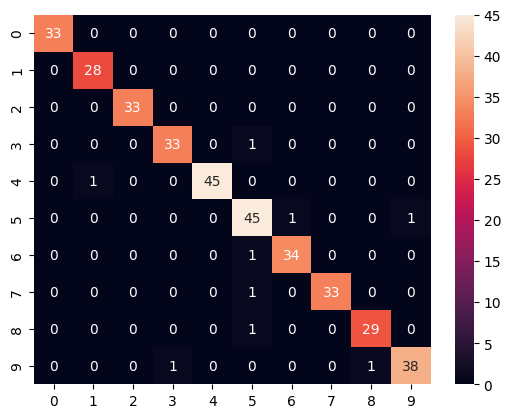

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d");

In [76]:
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



# Decision Tree

In [96]:
dt = DecisionTreeClassifier(criterion="log_loss", ccp_alpha=0.0001)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='log_loss')

In [98]:
y_pred_dt = dt.predict(X_test)

In [99]:
dt.score(X_test, y_test)

0.9

In [100]:
accuracy_score(y_test, y_pred_dt)

0.9

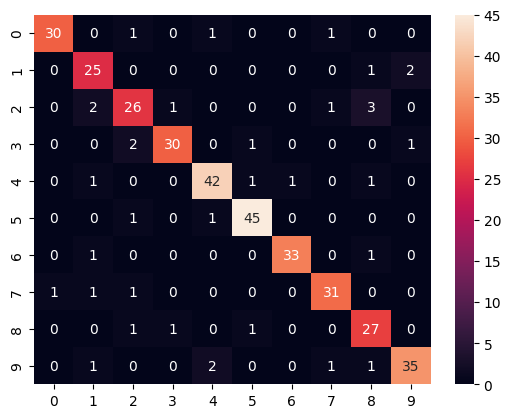

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d");

In [102]:
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.81      0.89      0.85        28
           2       0.81      0.79      0.80        33
           3       0.94      0.88      0.91        34
           4       0.91      0.91      0.91        46
           5       0.94      0.96      0.95        47
           6       0.97      0.94      0.96        35
           7       0.91      0.91      0.91        34
           8       0.79      0.90      0.84        30
           9       0.92      0.88      0.90        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360



# Random Forest

In [127]:
rf = RandomForestClassifier(n_estimators=10000, criterion="log_loss", max_features="log2")
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=10000)

In [128]:
y_pred_rf = rf.predict(X_test)

In [129]:
rf.score(X_test, y_test)

0.9777777777777777

In [130]:
accuracy_score(y_test, y_pred_rf)

0.9777777777777777

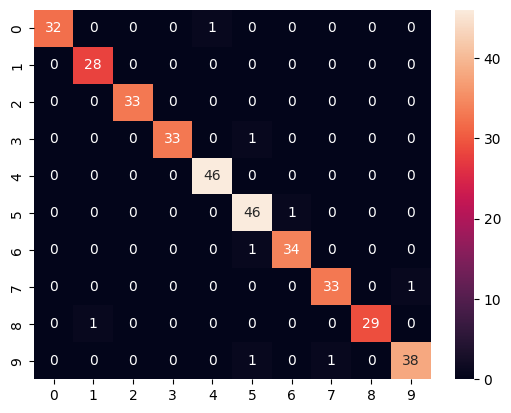

In [131]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d");

In [132]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



#Support Vector Machine

In [158]:
svm = SVC(kernel="poly", gamma="scale")
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [159]:
y_pred_svm = svm.predict(X_test)

In [160]:
svm.score(X_test, y_test)

0.9916666666666667

In [161]:
accuracy_score(y_test, y_pred_svm)

0.9916666666666667

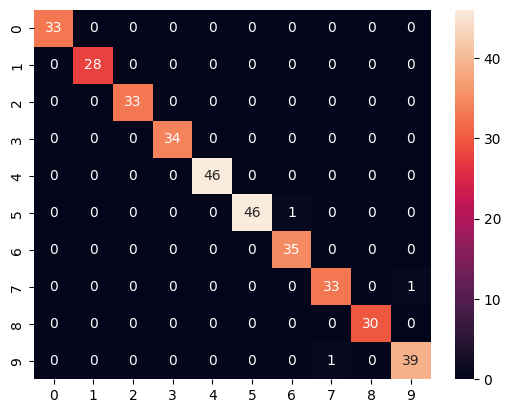

In [162]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d");

In [163]:
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [183]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [184]:
digs = []
for i in df.iloc[1796]:
  digs.append(i)

In [185]:
svm.predict([digs[:-1]])

array([8])